<a href="https://colab.research.google.com/github/tomhyhan/noodles/blob/main/pasta_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import userdata
from google.colab import auth

auth.authenticate_user()
token = userdata.get('token')
username = userdata.get('username')
repo_name = "noodles"

In [3]:
import os

!git clone https://github.com/tomhyhan/{repo_name}.git

if os.getcwd() != f"/content/{repo_name}":
    %cd {repo_name}
!git pull
!pwd


Cloning into 'noodles'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 282 (delta 15), reused 17 (delta 7), pack-reused 244 (from 1)
Receiving objects: 100% (282/282), 3.41 MiB | 7.86 MiB/s, done.
Resolving deltas: 100% (150/150), done.
/content/noodles
Already up to date.
/content/noodles


In [4]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "noodles"

GOOGLE_DRIVE_PATH = os.path.join("..", "drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)


In [6]:

from model.utils import test_colab
test_colab()


Hello Colab! from Noodles ha


In [ ]:
!pip install torchinfo
!pip install imagehash

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold


from config.config_manager import ConfigManager
from collections import Counter
from model.data_model import PastaData, create_train_transforms, create_test_transforms
from model.train import trainer, create_model
from model.utils import reset_seed, save_model
from model.data import CLASS_ENCODER, create_csv
from model.viz import class_imbalance, draw_loss, draw_train_val_accuracy

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
config_manager = ConfigManager("./config/config.yml")

SEED = config_manager.config.seed

In [ ]:
reset_seed(SEED)

In [ ]:
image_path = os.path.join(GOOGLE_DRIVE_PATH, "images")
csv_file_path = os.path.join(GOOGLE_DRIVE_PATH, "pasta_data.csv")

if not os.path.exists(csv_file_path):
    create_csv(image_path, csv_file_path)

In [ ]:
data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, "./pasta_data.csv"))
image_paths, labels = data["img_path"], data["label"]

X, test_data, y, test_label = train_test_split(image_paths.values, labels.values, train_size=0.9, random_state=SEED, shuffle=True, stratify=labels)

5032 1259


Epoch 1/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [2.8124482052165346e-05]
Epoch 1 Loss: 2.5911804121783657 Train Accuracy: 0.7516025641025641             Validation Accuracy: 0.6909722222222222
Global gradient norm: 11.83089037091747


Epoch 2/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [7.624831844677606e-05]
Epoch 2 Loss: 1.7766745584642785 Train Accuracy: 0.9124599358974359             Validation Accuracy: 0.828125
Global gradient norm: 9.083450498059028


Epoch 3/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [9.999963215091438e-05]
Epoch 3 Loss: 1.5391281578275893 Train Accuracy: 0.9421073717948718             Validation Accuracy: 0.8402777777777778
Global gradient norm: 8.401859842978926


Epoch 4/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [9.496491583619161e-05]
Epoch 4 Loss: 1.3444706517407017 Train Accuracy: 0.9733573717948718             Validation Accuracy: 0.8342013888888888
Global gradient norm: 7.408141995740526


Epoch 5/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [8.10243860940607e-05]
Epoch 5 Loss: 1.3048085229009645 Train Accuracy: 0.9725560897435898             Validation Accuracy: 0.84375
Global gradient norm: 6.083596975323051


Epoch 6/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [6.0939135809328065e-05]
Epoch 6 Loss: 1.3095675788374028 Train Accuracy: 0.9897836538461539             Validation Accuracy: 0.8602430555555556
Global gradient norm: 3.906578130217576


Epoch 7/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [3.868729513031439e-05]
Epoch 7 Loss: 1.2438517228150978 Train Accuracy: 0.9925881410256411             Validation Accuracy: 0.8637152777777778
Global gradient norm: 2.615079766248288


Epoch 8/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [1.8676114004415106e-05]
Epoch 8 Loss: 1.1826061509613297 Train Accuracy: 0.9931891025641025             Validation Accuracy: 0.8689236111111112
Global gradient norm: 5.733526568206383


Epoch 9/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [4.86905227464534e-06]
Epoch 9 Loss: 1.1213148419673626 Train Accuracy: 0.9939903846153846             Validation Accuracy: 0.8741319444444444
Global gradient norm: 1.0274660790907448


Epoch 10/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [7.678490856237001e-10]
Epoch 10 Loss: 1.1206417323177695 Train Accuracy: 0.9937900641025641             Validation Accuracy: 0.875
Global gradient norm: 3.507556938497782
End of Training for regnet Model 0-fold
best accuracy: 0.875


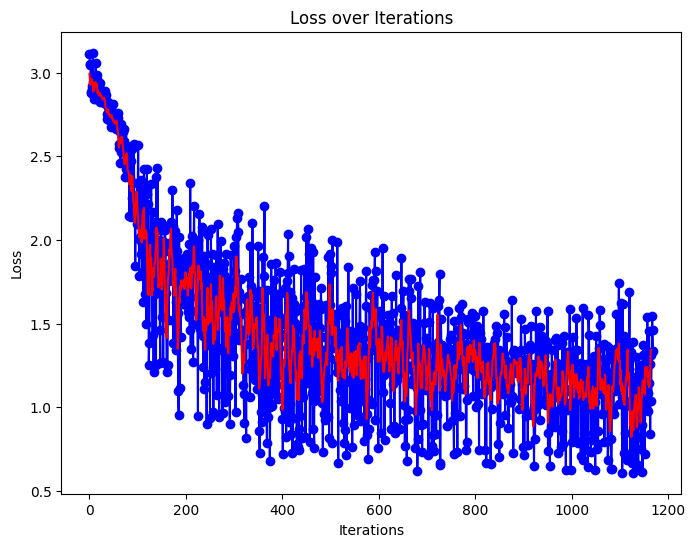

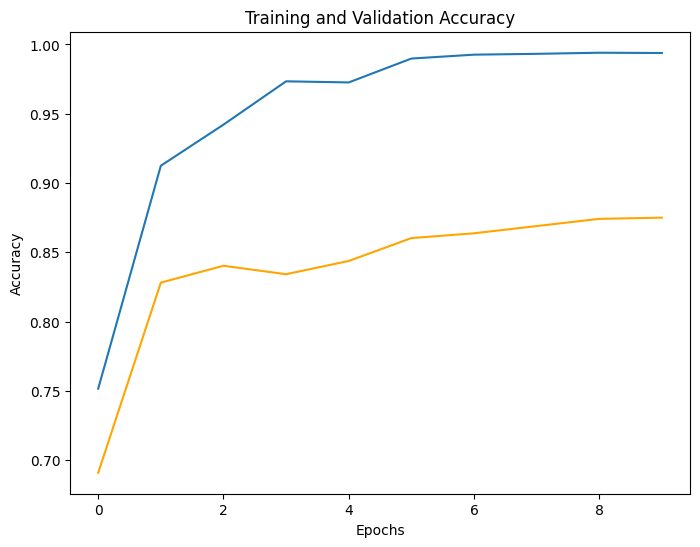

5033 1258


Epoch 1/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [2.8124482052165346e-05]
Epoch 1 Loss: 2.6008947853349214 Train Accuracy: 0.7401842948717948             Validation Accuracy: 0.7065972222222222
Global gradient norm: 12.469626634323093


Epoch 2/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [7.624831844677606e-05]
Epoch 2 Loss: 1.7262619601355658 Train Accuracy: 0.9032451923076923             Validation Accuracy: 0.8177083333333334
Global gradient norm: 8.22413046525711


Epoch 3/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [9.999963215091438e-05]
Epoch 3 Loss: 1.562333372923044 Train Accuracy: 0.9395032051282052             Validation Accuracy: 0.8420138888888888
Global gradient norm: 6.416361073431555


Epoch 4/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [9.496491583619161e-05]
Epoch 4 Loss: 1.4561752534320211 Train Accuracy: 0.9657451923076923             Validation Accuracy: 0.84375
Global gradient norm: 7.0893104247100185


Epoch 5/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [8.10243860940607e-05]
Epoch 5 Loss: 1.329080645345215 Train Accuracy: 0.9717548076923077             Validation Accuracy: 0.84375
Global gradient norm: 3.0539876004482225


Epoch 6/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [6.0939135809328065e-05]
Epoch 6 Loss: 1.2317715608156645 Train Accuracy: 0.9893830128205128             Validation Accuracy: 0.8654513888888888
Global gradient norm: 2.030751069755476


Epoch 7/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [3.868729513031439e-05]
Epoch 7 Loss: 1.195888662440145 Train Accuracy: 0.9917868589743589             Validation Accuracy: 0.8793402777777778
Global gradient norm: 1.1977763601114737


Epoch 8/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [1.8676114004415106e-05]
Epoch 8 Loss: 1.2033245583884737 Train Accuracy: 0.9931891025641025             Validation Accuracy: 0.8784722222222222
Global gradient norm: 1.9016654938395618


Epoch 9/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [4.86905227464534e-06]
Epoch 9 Loss: 1.1664662065669003 Train Accuracy: 0.9927884615384616             Validation Accuracy: 0.8758680555555556
Global gradient norm: 2.686359634651582


Epoch 10/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [7.678490856237001e-10]
Epoch 10 Loss: 1.1518705502534523 Train Accuracy: 0.9931891025641025             Validation Accuracy: 0.8793402777777778
Global gradient norm: 2.7747473387896546
End of Training for regnet Model 1-fold
best accuracy: 0.8793402777777778


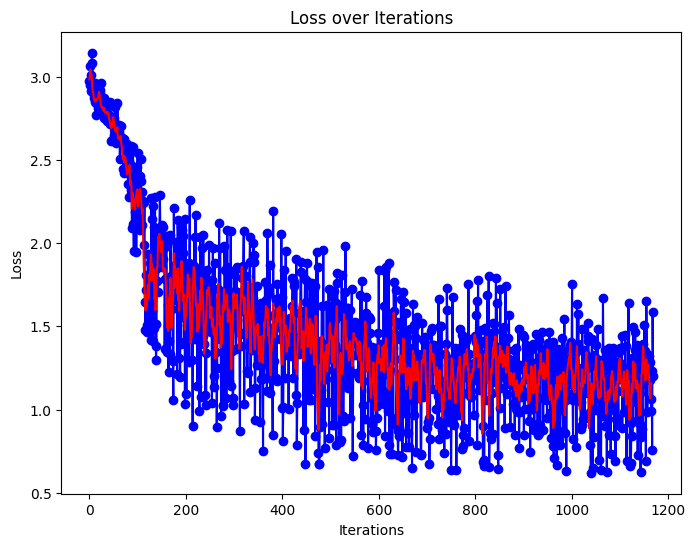

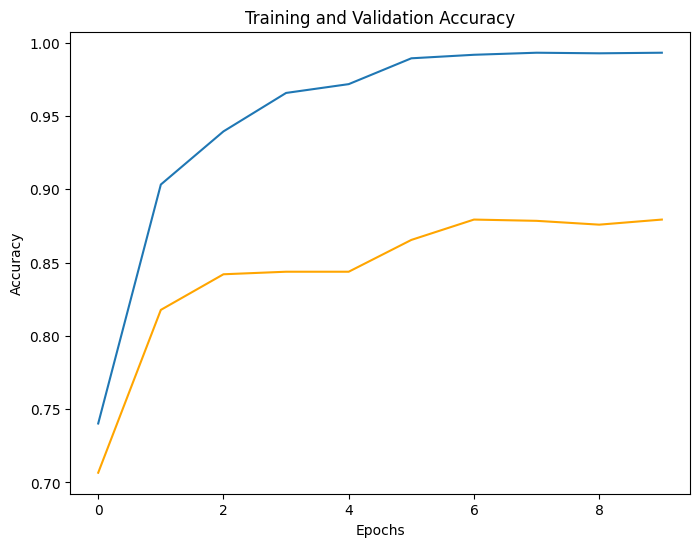

5033 1258


Epoch 1/10:   0%|          | 0/117 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


Learning Rate: [2.8124482052165346e-05]
Epoch 1 Loss: 2.5809511262127476 Train Accuracy: 0.7688301282051282             Validation Accuracy: 0.7126736111111112
Global gradient norm: 14.440194443379045


Epoch 2/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [7.624831844677606e-05]
Epoch 2 Loss: 1.7323310232570028 Train Accuracy: 0.9196714743589743             Validation Accuracy: 0.8368055555555556
Global gradient norm: 9.358979613621008


Epoch 3/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [9.999963215091438e-05]
Epoch 3 Loss: 1.5276604732896528 Train Accuracy: 0.9575320512820513             Validation Accuracy: 0.8411458333333334
Global gradient norm: 6.851500908178432


Epoch 4/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [9.496491583619161e-05]
Epoch 4 Loss: 1.4227390951580472 Train Accuracy: 0.9693509615384616             Validation Accuracy: 0.8246527777777778
Global gradient norm: 8.121140202459713


Epoch 5/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [8.10243860940607e-05]
Epoch 5 Loss: 1.3727979583617969 Train Accuracy: 0.9797676282051282             Validation Accuracy: 0.8376736111111112
Global gradient norm: 5.21535785643408


Epoch 6/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [6.0939135809328065e-05]
Epoch 6 Loss: 1.2479872550719824 Train Accuracy: 0.9897836538461539             Validation Accuracy: 0.8567708333333334
Global gradient norm: 4.290962397404901


Epoch 7/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [3.868729513031439e-05]
Epoch 7 Loss: 1.236896835331224 Train Accuracy: 0.9905849358974359             Validation Accuracy: 0.8506944444444444
Global gradient norm: 3.6114491707845553


Epoch 8/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [1.8676114004415106e-05]
Epoch 8 Loss: 1.1977948082817926 Train Accuracy: 0.992988782051282             Validation Accuracy: 0.8619791666666666
Global gradient norm: 2.584643316934025


Epoch 9/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [4.86905227464534e-06]
Epoch 9 Loss: 1.1511838940473704 Train Accuracy: 0.992988782051282             Validation Accuracy: 0.8645833333333334
Global gradient norm: 3.9855393293956056


Epoch 10/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [7.678490856237001e-10]
Epoch 10 Loss: 1.1295257857722094 Train Accuracy: 0.9923878205128205             Validation Accuracy: 0.8619791666666666
Global gradient norm: 2.2426352416328252
End of Training for regnet Model 2-fold
best accuracy: 0.8645833333333334


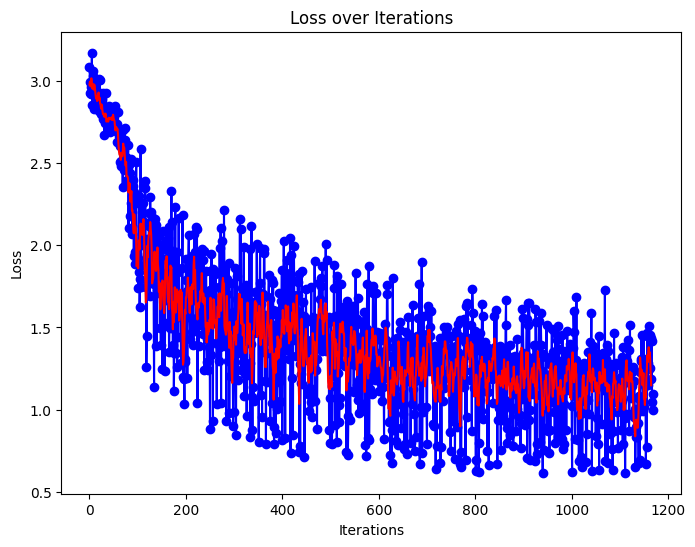

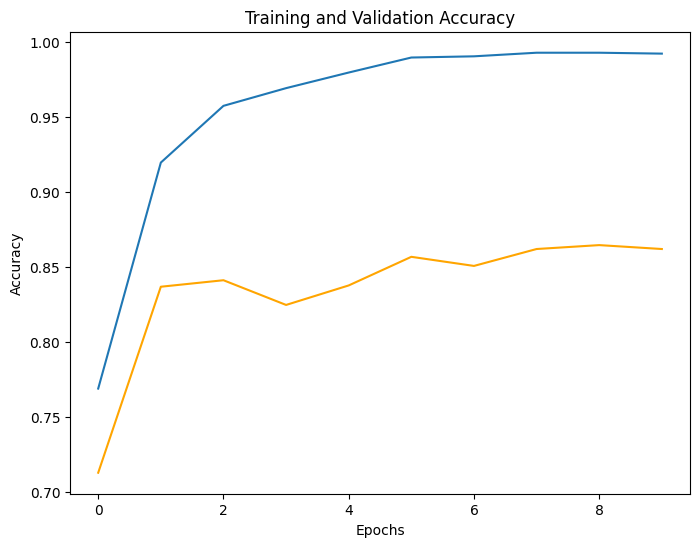

5033 1258


Epoch 1/10:   0%|          | 0/117 [00:00<?, ?it/s]

Learning Rate: [2.8124482052165346e-05]
Epoch 1 Loss: 2.5703817636538773 Train Accuracy: 0.7698317307692307             Validation Accuracy: 0.6961805555555556
Global gradient norm: 12.454866886611363


Epoch 2/10:   0%|          | 0/117 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.39 GiB. GPU 0 has a total capacity of 22.17 GiB of which 562.88 MiB is free. Process 949286 has 21.61 GiB memory in use. Of the allocated memory 6.33 GiB is allocated by PyTorch, and 15.03 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
k_fold = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
models = ['convnext']

# N=100
# perm_indices = np.random.permutation(N)
# X = X[perm_indices]
# y = y[perm_indices]

for model_name in models:
    current_model_accuracies = []
    for k_id, (train_i, val_i) in enumerate(k_fold.split(X,y)):
        if k_id in [3]:
            continue
        print(len(train_i), len(val_i))
        train_set = X[train_i]
        train_label_set = y[train_i]

        val_set = X[val_i]
        val_label_set = y[val_i]

        model_config = config_manager.config[model_name]
        lr = config_manager.config.lr
        num_epochs = config_manager.config.num_epochs
        num_classes = config_manager.config.num_classes

        device = 'cuda' if torch.cuda.is_available() else 'cpu'

        train_transform = create_train_transforms()
        test_transform = create_test_transforms()

        train_data = PastaData(train_set, train_label_set, transform_list=train_transform)
        train_data_accuracy = PastaData(train_set, train_label_set, transform_list=test_transform)
        val_data = PastaData(val_set, val_label_set, transform_list=test_transform)

        train_loader = DataLoader(train_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        train_loader_accuracy = DataLoader(train_data_accuracy, batch_size=model_config.batch_size, shuffle=False, drop_last=True)
        val_loader = DataLoader(val_data, batch_size=model_config.batch_size, shuffle=False, drop_last=True)

        model = create_model(model_name, num_classes)
        model.to(device)

        result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
        os.makedirs(result_dir, exist_ok=True)

        out_file = os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt")

        resume = False
        if os.path.exists(out_file):
            print(f"=== {out_file} exist! ===")
            resume = True

        #  need to make dataframe from images
        loss_history, train_accuracy_history, \
        val_accuracy_history, best_accuracy, model, optimizer, scaler, end_epoch = trainer(
            model,
            train_loader,
            train_loader_accuracy,
            val_loader,
            num_epochs=num_epochs,
            lr=lr,
            model_config=model_config,
            device=device,
            resume=resume,
            out_file=out_file,
            num_classes=num_classes
        )


        current_model_accuracies.append(best_accuracy)
        print(f"End of Training for {model_name} Model {k_id}-fold")
        print(f"best accuracy: {best_accuracy}")

        save_model(model, optimizer, scaler, end_epoch, out_file, best_accuracy)
        # torch.save(best_params, os.path.join(result_dir, f"{model_name}_k_fold_{k_id}.pt"))
        draw_loss(loss_history)
        draw_train_val_accuracy(train_accuracy_history, val_accuracy_history)

    print("current_model_accuracies", current_model_accuracies)


        # avg_accuracy = torch.mean(fold_accuracies)
        # std_accuracy = torch.std(fold_accuracies)

        # general plan
        # 1. save best accuracies
        # 2. compare with different models
        # 3. train on full dataset with best performing model
        # 4. make inference


In [ ]:
from pathlib import Path
import glob

In [ ]:
models = ['convnext']
for model_name in models:
    model_config = config_manager.config[model_name]
    result_dir = os.path.join(GOOGLE_DRIVE_PATH, model_config.output_dir)
    output_dir = Path(result_dir)
    checkpt_paths =  glob.glob(os.path.join(output_dir, f"{model_name}_k_fold_*.pt"))
    accuracy_list = []
    epochs = []
    for checkpt_path in checkpt_paths:
        checkpoint = torch.load(checkpt_path, map_location='cpu')
        accuracy_list.append(checkpoint["best_accuracy"])
        epochs.append(checkpoint["epoch"] + 1)
    print("Model: ", model_name)
    print("epochs: ", epochs)
    print("Accuracy list: ",  accuracy_list)
    print("Accuracy Mean: ", np.mean(accuracy_list))
    print("Accuracy std: ", np.std(accuracy_list))

In [ ]:
# Inference

In [7]:
!git pull
!git config --global user.email "tomhyhan@gmail.com"
!git config --global user.name username
!git add .
!git status
!git commit -m "updated trainer"
!git push https://{token}@github.com/{username}/{repo_name}.git

Already up to date.
On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   config/config.yml

[main eff03b6] updated trainer
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 12 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 406 bytes | 406.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/tomhyhan/noodles.git
   e1b91e5..eff03b6  main -> main
